In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#import data
airbnb_data = pd.read_csv('../raw_data/data/listings.csv')

In [4]:
airbnb_data.info

<bound method DataFrame.info of                        id                                      listing_url  \
0                  150097              https://www.airbnb.com/rooms/150097   
1                   40667               https://www.airbnb.com/rooms/40667   
2                     109                 https://www.airbnb.com/rooms/109   
3                  152514              https://www.airbnb.com/rooms/152514   
4                   43318               https://www.airbnb.com/rooms/43318   
...                   ...                                              ...   
44459  906838372251518667  https://www.airbnb.com/rooms/906838372251518667   
44460  906849730595831419  https://www.airbnb.com/rooms/906849730595831419   
44461  906864593949172534  https://www.airbnb.com/rooms/906864593949172534   
44462  906867349473658950  https://www.airbnb.com/rooms/906867349473658950   
44463  906872151078347575  https://www.airbnb.com/rooms/906872151078347575   

            scrape_id last_scra

In [5]:
#get a sense of the data
airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,150097,https://www.airbnb.com/rooms/150097,20230606052736,2023-06-07,city scrape,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,https://a0.muscache.com/pictures/6793974d-9fb2...,647546,...,4.99,4.90,4.95,NaN,f,4,1,3,0,1.67
1,40667,https://www.airbnb.com/rooms/40667,20230606052736,2023-06-07,city scrape,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,https://a0.muscache.com/pictures/70033015/cb7f...,175264,...,4.64,4.36,4.45,NaN,f,1,0,1,0,0.08
2,109,https://www.airbnb.com/rooms/109,20230606052736,2023-06-07,city scrape,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01
3,152514,https://www.airbnb.com/rooms/152514,20230606052736,2023-06-07,city scrape,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,733870,...,5.00,5.00,4.00,NaN,f,2,2,0,0,0.01
4,43318,https://www.airbnb.com/rooms/43318,20230606052736,2023-06-07,city scrape,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,Little Tokyo is the most vibrant area of downt...,https://a0.muscache.com/pictures/938a66db-d66b...,156094545,...,4.73,4.68,4.53,Exempt - This listing is a hotel or motel,f,14,0,14,0,0.72


In [6]:
airbnb_data.set_index('id')

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
150097,https://www.airbnb.com/rooms/150097,20230606052736,2023-06-07,city scrape,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,https://a0.muscache.com/pictures/6793974d-9fb2...,647546,https://www.airbnb.com/users/show/647546,...,4.99,4.90,4.95,NaN,f,4,1,3,0,1.67
40667,https://www.airbnb.com/rooms/40667,20230606052736,2023-06-07,city scrape,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,https://a0.muscache.com/pictures/70033015/cb7f...,175264,https://www.airbnb.com/users/show/175264,...,4.64,4.36,4.45,NaN,f,1,0,1,0,0.08
109,https://www.airbnb.com/rooms/109,20230606052736,2023-06-07,city scrape,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,https://www.airbnb.com/users/show/521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01
152514,https://www.airbnb.com/rooms/152514,20230606052736,2023-06-07,city scrape,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,733870,https://www.airbnb.com/users/show/733870,...,5.00,5.00,4.00,NaN,f,2,2,0,0,0.01
43318,https://www.airbnb.com/rooms/43318,20230606052736,2023-06-07,city scrape,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,Little Tokyo is the most vibrant area of downt...,https://a0.muscache.com/pictures/938a66db-d66b...,156094545,https://www.airbnb.com/users/show/156094545,...,4.73,4.68,4.53,Exempt - This listing is a hotel or motel,f,14,0,14,0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906838372251518667,https://www.airbnb.com/rooms/906838372251518667,20230606052736,2023-06-07,city scrape,Rental unit in Los Angeles · ★New · 2 bedrooms...,Guesthouse is a collection of creatively desig...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,325135786,https://www.airbnb.com/users/show/325135786,...,NaN,NaN,NaN,NaN,t,9,9,0,0,NaN
906849730595831419,https://www.airbnb.com/rooms/906849730595831419,20230606052736,2023-06-07,city scrape,Rental unit in View Park-Windsor Hills · ★New ...,> Private room with shared bathroom <br />> 3 ...,"Located on Lacienega blvd, Inglewood<br />Plea...",https://a0.muscache.com/pictures/miso/Hosting-...,14936368,https://www.airbnb.com/users/show/14936368,...,NaN,NaN,NaN,NaN,f,106,23,83,0,NaN
906864593949172534,https://www.airbnb.com/rooms/906864593949172534,20230606052736,2023-06-07,city scrape,Rental unit in Los Angeles · ★New · 1 bedroom ...,> CoLiving apartment with 3 private bedrooms i...,"Hart of Westwood, UCAL walking distance",https://a0.muscache.com/pictures/miso/Hosting-...,14936368,https://www.airbnb.com/users/show/14936368,...,NaN,NaN,NaN,NaN,t,106,23,83,0,NaN


In [7]:
print(type(airbnb_data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
#print column names
for col in airbnb_data.columns:
    print(col)    

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
re

In [9]:
#check how many null values across columns
airbnb_data.isnull().sum().sort_values(ascending=False).head(10)

calendar_updated          44464
bathrooms                 44464
license                   34877
host_about                18311
neighborhood_overview     18242
neighbourhood             18241
bedrooms                  14752
review_scores_value       12942
review_scores_location    12940
review_scores_checkin     12938
dtype: int64

In [10]:
#clear unnecessary columns / columns with all null values
cols_to_drop = ['bathrooms', 'calendar_updated', 'neighbourhood', 'host_about', 'license', 'picture_url', 'source', 'host_url', 'neighborhood_overview', 'scrape_id', 'listing_url', 'host_thumbnail_url', 'host_picture_url', 'last_scraped', 'calendar_last_scraped', 'host_about']

In [11]:
airbnb_data.drop(cols_to_drop, axis=1, inplace=True)

In [12]:
#check to see if there are any null values in the target feature
airbnb_data['price'].isnull().sum()

0

In [13]:
#check object data types
airbnb_data.select_dtypes('object').head()

,name,description,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,first_review,last_review,instant_bookable
0,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,Marco,2011-05-31,"North Hollywood, CA",within an hour,100%,100%,NaN,Valley Glen,...,City of Los Angeles,Private room in bed and breakfast,Private room,1 private bath,"[""Private pool"", ""Smoke alarm"", ""Garden view"",...",$80.00,t,2012-11-02,2020-11-29,f
1,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",Michael,2010-07-20,"Los Angeles, CA",within a day,100%,17%,NaN,South Robertson,...,City of Los Angeles,Private room in rental unit,Private room,1.5 shared baths,"[""Smoke alarm"", ""Hot water"", ""Free street park...",$59.00,t,2011-07-20,2018-08-24,f
2,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",Paolo,2008-06-27,"San Francisco, CA",within a few hours,100%,0%,f,Culver City,...,Other Cities,Entire condo,Entire home/apt,2 baths,"[""Smoke alarm"", ""Garden view"", ""Pool view"", ""R...",$129.00,t,2011-08-15,2016-05-15,f
3,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,Jeanette,2011-06-23,"Fort Lauderdale, FL",within an hour,100%,99%,t,Manhattan Beach,...,Other Cities,Entire guesthouse,Entire home/apt,1 bath,"[""Lockbox"", ""Smoke alarm"", ""Toaster"", ""Hot wat...",$132.00,t,2013-05-24,2013-05-24,f
4,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,Sogo,2017-10-24,NaN,NaN,NaN,NaN,f,NaN,...,City of Los Angeles,Private room in hostel,Private room,11 shared baths,"[""Lockbox"", ""Smoke alarm"", ""Hot water"", ""Free ...",$47.00,t,2010-09-22,2023-05-18,f


In [14]:
#change price column from object to float and remove special characters
char_remove = {'$':'', ',':''}
for key, value in char_remove.items():
    airbnb_data['price'] = airbnb_data['price'].str.replace(key, value, regex=True)
    
airbnb_data['price'] = airbnb_data['price'].astype('float')

In [15]:
#double check price data type
airbnb_data['price'].dtypes

dtype('float64')

In [16]:
#change date columns from object to datetime
airbnb_data[['first_review', 'last_review', 'host_since']] = airbnb_data[['first_review', 'last_review', 'host_since']].apply(pd.to_datetime)

In [17]:
#recheck to see if any other object features need to be corrected
airbnb_data.select_dtypes('object').head()

,name,description,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,instant_bookable
0,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,Marco,"North Hollywood, CA",within an hour,100%,100%,NaN,Valley Glen,"['email', 'phone']",t,t,Valley Glen,City of Los Angeles,Private room in bed and breakfast,Private room,1 private bath,"[""Private pool"", ""Smoke alarm"", ""Garden view"",...",t,f
1,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",Michael,"Los Angeles, CA",within a day,100%,17%,NaN,South Robertson,"['email', 'phone']",t,f,Mid-City,City of Los Angeles,Private room in rental unit,Private room,1.5 shared baths,"[""Smoke alarm"", ""Hot water"", ""Free street park...",t,f
2,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",Paolo,"San Francisco, CA",within a few hours,100%,0%,f,Culver City,"['email', 'phone']",t,t,Culver City,Other Cities,Entire condo,Entire home/apt,2 baths,"[""Smoke alarm"", ""Garden view"", ""Pool view"", ""R...",t,f
3,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,Jeanette,"Fort Lauderdale, FL",within an hour,100%,99%,t,Manhattan Beach,"['email', 'phone']",t,t,Manhattan Beach,Other Cities,Entire guesthouse,Entire home/apt,1 bath,"[""Lockbox"", ""Smoke alarm"", ""Toaster"", ""Hot wat...",t,f
4,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,Sogo,NaN,NaN,NaN,NaN,f,NaN,"['email', 'phone']",f,f,Downtown,City of Los Angeles,Private room in hostel,Private room,11 shared baths,"[""Lockbox"", ""Smoke alarm"", ""Hot water"", ""Free ...",t,f


In [18]:
#get a sense of what neighborhood and price features look like 
airbnb_data[['neighbourhood_cleansed', 'price']]

,neighbourhood_cleansed,price
0,Valley Glen,80.0
1,Mid-City,59.0
2,Culver City,129.0
3,Manhattan Beach,132.0
4,Downtown,47.0
...,...,...
44459,Echo Park,190.0
44460,View Park-Windsor Hills,35.0
44461,Westwood,54.0
44462,Vernon,78.0


In [19]:
#Distribution of price by neighborhood

neighborhood_price_means = airbnb_data.groupby(by='neighbourhood_cleansed')['price'].mean()
neighborhood_price_means.head(10)

neighbourhood_cleansed
Acton              199.833333
Adams-Normandie    105.205882
Agoura Hills       310.369231
Agua Dulce         292.560000
Alhambra           185.526839
Alondra Park       234.470588
Altadena           215.545082
Angeles Crest      223.400000
Arcadia            167.822335
Arleta             344.777778
Name: price, dtype: float64

In [20]:
#check for price outliers...there are some that may be outliers but we will filter them out
airbnb_data['price'].sort_values(ascending=False).head()

25496    90150.0
14599    90119.0
17609    23343.0
30568    22092.0
7688     21053.0
Name: price, dtype: float64

In [21]:
#check to see how many listings have pricing over $5000/night. Are some of these outliers, or priced incorrectly?
airbnb_data.loc[airbnb_data.price > 5000]

,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
488,822169,Home in Beverly Hills · ★4.82 · 4 bedrooms · 5...,"Super Bowl 3 night weekend package 90,000. Co...",4317352,Scott,2012-12-03,"Beverly Hills, CA",a few days or more,0%,NaN,...,4.88,4.90,4.76,4.76,f,1,1,0,0,0.43
985,1865992,Villa in Malibu · ★5.0 · 4 bedrooms · 6 beds ·...,BEACHFRONT ARCHITECTURAL MASTERPIECE. <br /><b...,9729343,Casa Di Pietra,2013-10-30,"Los Angeles, CA",within a day,75%,NaN,...,5.00,4.93,4.87,4.80,f,1,1,0,0,0.16
1743,4029464,Home in Beverly Hills · 7 bedrooms · 7 beds · ...,A ONE YEAR LEASE IS ALSO AVAILABLE AT A REDUCE...,10156476,Robert,2013-11-20,"Los Angeles, CA",within an hour,100%,77%,...,NaN,NaN,NaN,NaN,f,9,9,0,0,NaN
2672,7023661,Condo in Alhambra · ★5.0 · 1 bedroom · 1 bed ·...,"Your lovely, sunny, luxurious, and spacious tw...",5493138,Vivian & Cuyler,2013-03-17,"Los Angeles, CA",NaN,NaN,NaN,...,5.00,5.00,5.00,5.00,f,2,1,1,0,0.15
2699,6730240,Condo in Alhambra · ★4.99 · 1 bedroom · 1 bed ...,Your peaceful & spacious private bedroom and f...,5493138,Vivian & Cuyler,2013-03-17,"Los Angeles, CA",NaN,NaN,NaN,...,4.98,4.98,4.92,4.98,f,2,1,1,0,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43068,889073728677803128,Home in Beverly Hills · ★New · 7 bedrooms · 7 ...,Gated Mid-Century View Home in Prime Beverly H...,118262470,Living The Dream,2017-02-26,NaN,within an hour,100%,96%,...,NaN,NaN,NaN,NaN,t,16,16,0,0,NaN
43424,893793531420950212,Home in Santa Monica · ★New · 3 bedrooms · 4 b...,Enjoy a memorable visit when you stay in this ...,385008803,Emil,2021-01-17,"Los Angeles, CA",within an hour,100%,96%,...,NaN,NaN,NaN,NaN,t,3,2,1,0,NaN
43557,895836044506982565,Villa in Beverly Hills · ★New · 5 bedrooms · 5...,"Beverly Hills estate: 13,000 sqft, 7 en-suite ...",507084725,Beverly Hills Luxury Leases,2023-03-26,"Beverly Hills, CA",within an hour,100%,0%,...,NaN,NaN,NaN,NaN,f,20,20,0,0,NaN
43558,895836283902429293,Home in Beverly Hills · ★New · 5 bedrooms · 5 ...,Experience luxury in Beverly Hills. This exqui...,507084725,Beverly Hills Luxury Leases,2023-03-26,"Beverly Hills, CA",within an hour,100%,0%,...,NaN,NaN,NaN,NaN,f,20,20,0,0,NaN


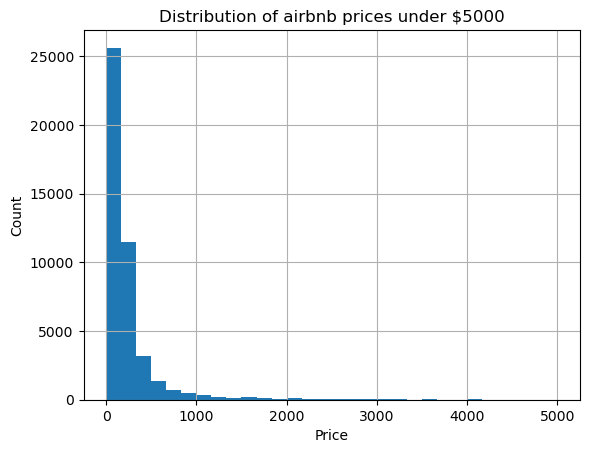

In [23]:
#show distribution of prices under $5000
airbnb_data.price[airbnb_data.price < 5000].hist(bins=30)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of airbnb prices under $5000');

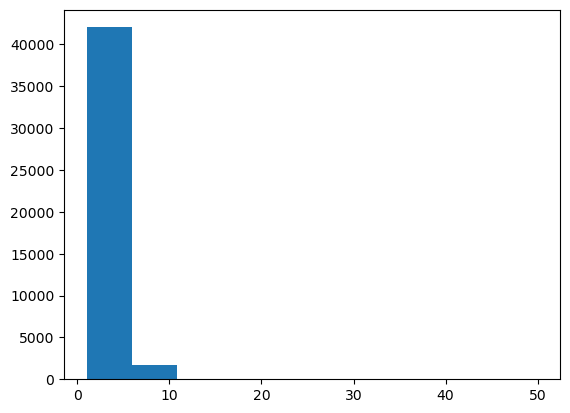

In [25]:
#show distribution of number of beds per listing
plt.hist(airbnb_data['beds'])
plt.show()

In [27]:
#recheck which other features have a lot of null values.. should I keep them?
na_count = airbnb_data.isna().sum()
print(na_count.sort_values(ascending=False).head(30))

bedrooms                       14752
review_scores_value            12942
review_scores_location         12940
review_scores_checkin          12938
review_scores_cleanliness      12934
review_scores_accuracy         12933
review_scores_communication    12932
first_review                   12689
last_review                    12689
review_scores_rating           12689
reviews_per_month              12689
host_is_superhost              11881
host_response_time              9975
host_response_rate              9975
host_acceptance_rate            9423
host_location                   9173
host_neighbourhood              9157
description                      699
beds                             552
bathrooms_text                    29
minimum_nights_avg_ntm             4
maximum_nights_avg_ntm             4
minimum_minimum_nights             4
maximum_minimum_nights             4
minimum_maximum_nights             4
maximum_maximum_nights             4
host_identity_verified             2
h

In [28]:
#check for outliers in the bedrooms column
airbnb_data['bedrooms'].sort_values(ascending=False)

44150    50.0
42751    32.0
22941    24.0
25660    23.0
13450    19.0
         ... 
44408     NaN
44420     NaN
44424     NaN
44425     NaN
44426     NaN
Name: bedrooms, Length: 44464, dtype: float64

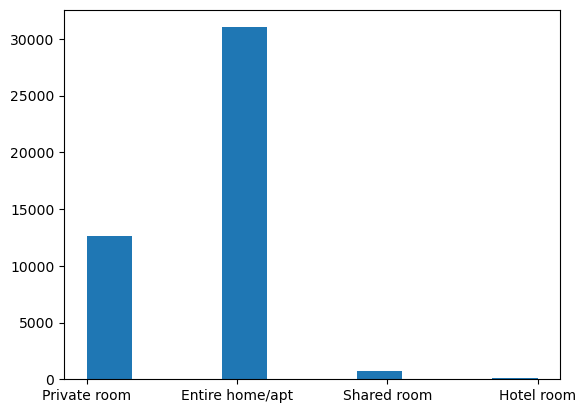

In [30]:
#show distribution of room types
plt.hist(airbnb_data['room_type'])
plt.show()

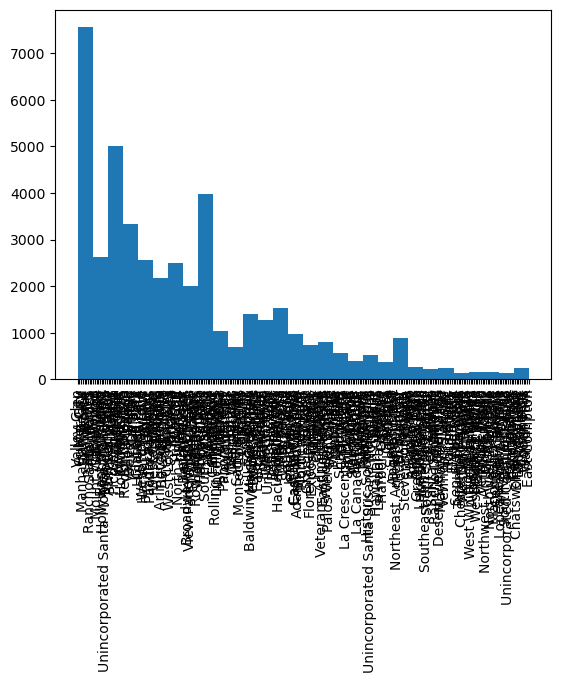

In [31]:
#distribution of listings per neighborhood. Is there a better way to show this?
plt.hist(airbnb_data['neighbourhood_cleansed'], bins=30)
plt.xticks(rotation='vertical')
plt.show()